In [3]:
import pandas as pd

In [5]:
data1 = pd.read_csv(r"C:\Users\imran.chamieh\Desktop\MethError\data\1_5000_row.csv")
data1_json = pd.read_json(r"C:\Users\imran.chamieh\Desktop\MethError\data\json\1_5000_rwo.json")

In [6]:
data1.shape, data1_json.shape

((2441, 4), (3734, 4))

In [35]:
import re

# Function to map original variables to a smaller set
def map_variables(expression, max_vars=3):
    # Find all single-letter variables in the expression
    variables = sorted(set(re.findall(r'\b[a-zA-Z]\b', expression)))
    
    # Determine target variable names
    target_vars = ['x', 'y', 'z', 'm', 'n'][:max_vars]
    variable_map = {}
    
    # Create a mapping from original to target variables
    for original, new in zip(variables, target_vars):
        variable_map[original] = new
    
    # Replace original variables with target ones in the expression
    for original, new in variable_map.items():
        expression = re.sub(rf'\b{original}\b', new, expression)
    
    return expression

# Read CSV file into a DataFrame
df = data1

# Assuming the CSV has two columns: 'expr1' and 'expr2'
# You might need to adjust the column names based on your CSV file
for index, row in df.iterrows():
    expr1 = row['t0']
    expr2 = row['t1']
    
    # Apply variable mapping
    processed_expr1 = map_variables(expr1)
    processed_expr2 = map_variables(expr2)
    
    # Print results for each row
    print(f"Original: ({expr1}, {expr2})")
    print(f"Processed: ({processed_expr1}, {processed_expr2})\n")

# Optionally save the processed expressions to a new CSV
df['processed_t0'] = df['t0'].apply(map_variables)
df['processed_t1'] = df['t1'].apply(map_variables)
df.to_csv('processed_expressions.csv', index=False)

Original: (\left| \begin{array}{cc}a + 7& 7\\2& 4\end{array} \right| = -4, 4\,(a + 7) + 2 \cdot 7 = -4)
Processed: (\left| \begin{array}{cc}x + 7& 7\\2& 4\end{array} \right| = -4, 4\,(x + 7) + 2 \cdot 7 = -4)

Original: ((2\,x + 4)\,(2\,x-4), 4\,x-16)
Processed: ((2\,x + 4)\,(2\,x-4), 4\,x-16)

Original: ((3\,n-4\,k)\,(3\,n + 4\,k), 9\,n^{2}-16\,k)
Processed: ((3\,y-4\,x)\,(3\,y + 4\,x), 9\,y^{2}-16\,x)

Original: (-4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b}, \frac{4\,(b^{2}-l\,b)}{b^{2}-l\,b})
Processed: (-4\,y\,x + \frac{4\,x^{2}}{x^{2}-y\,x}, \frac{4\,(x^{2}-y\,x)}{x^{2}-y\,x})

Original: (-\frac{4\,l\,b}{b^{2}-l\,b} + \frac{4\,b^{2}}{b^{2}-l\,b}, -4\,l\,b + \frac{4\,b^{2}}{b^{2}-l\,b})
Processed: (-\frac{4\,y\,x}{x^{2}-y\,x} + \frac{4\,x^{2}}{x^{2}-y\,x}, -4\,y\,x + \frac{4\,x^{2}}{x^{2}-y\,x})

Original: (\frac{\frac{\left( u + g\right)^{2}}{u-g}-(u-g)}{2\,g}, \frac{\frac{\left( u + g\right)^{2}-2\,(u-g)}{u-g}}{2\,g})
Processed: (\frac{\frac{\left( y + x\right)^{2}}{y-x}-(y-x)}{2\,x}, 

In [37]:
df.tail()

,category,assumptions,t0,t1,processed_t0,processed_t1
2436,2,\textrm{wahr},\left( -\frac{5}{2} = f\right) \vee \left( -3 ...,\left( f = -3\right) \vee \left( f = -2\right),\left( -\frac{5}{2} = x\right) \vee \left( -3 ...,\left( x = -3\right) \vee \left( x = -2\right)
2437,2,q < \frac{p^{2}}{4},"x^{2} + p\,x + \left( \frac{p}{2}\right)^{2}-\...","\left( x + \frac{p}{2}\right)^{2}\,\left( \fra...","z^{2} + z\,z + \left( \frac{z}{2}\right)^{2}-\...","\left( z + \frac{z}{2}\right)^{2}\,\left( \fra..."
2438,2,q < \frac{p^{2}}{4},"\left( x + \frac{p}{2}\right)^{2}\,\left( \fra...",\left( \frac{p}{2}\right)^{2}-q = \left( x + \...,"\left( z + \frac{z}{2}\right)^{2}\,\left( \fra...",\left( \frac{z}{2}\right)^{2}-y = \left( z + \...
2439,2,x = +\frac{22}{14} + \sqrt{\left( -\frac{22}{1...,"\sqrt{2\,\left( \frac{11}{7} + \sqrt{\frac{86}...",\textrm{wahr},"\sqrt{2\,\left( \frac{11}{7} + \sqrt{\frac{86}...",\textrm{wahr}
2440,2,q < \frac{p^{2}}{4},\sqrt{\left( \frac{p}{2}\right)^{2}-q} = x + \...,"-\frac{p}{2}\,\sqrt{\left( \frac{p}{2}\right)^...",\sqrt{\left( \frac{z}{2}\right)^{2}-y} = z + \...,"-\frac{z}{2}\,\sqrt{\left( \frac{z}{2}\right)^..."


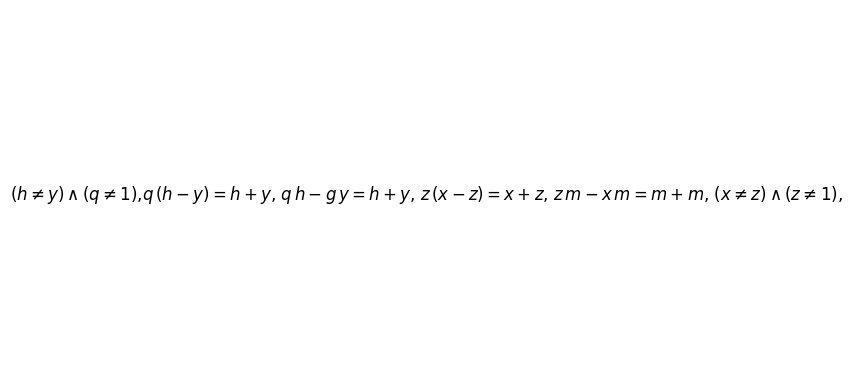

In [55]:
import matplotlib.pyplot as plt

# Example LaTeX expression
a = 8
latex_code = f"${df.iloc[a,1]}$,${df.iloc[a,2]}$, ${df.iloc[a,3]}$, ${df.iloc[a,4]}$, ${df.iloc[a,5]}$, ${df.iloc[a,6]}$,"

# Create a plot to render the LaTeX
plt.text(0.5, 0.5, latex_code, fontsize=12, ha='center', va='center')
plt.axis('off')
plt.show()

In [7]:
import re

def map_variables(expression):
    # Find unique single-letter variables in the order they appear
    variables = []
    for match in re.findall(r'\b[a-zA-Z]\b', expression):
        if match not in variables:
            variables.append(match)

    # Define the target mappings for lowercase and uppercase letters
    targets = "xyz"
    index = 0
    
    # Initialize mappings
    mapping = {}
    
    # Create mappings based on the order of appearance and case
    while index < len(targets) and variables:
        var = variables.pop(0)
        
        # Map the lowercase variable to the lowercase target
        if var.islower():
            mapping[var] = targets[index]
            # Check if the uppercase version also exists and map it to uppercase target
            if var.upper() in variables:
                mapping[var.upper()] = targets[index].upper()
                variables.remove(var.upper())
        
        # Map the uppercase variable to the uppercase target
        elif var.isupper():
            mapping[var] = targets[index].upper()
            # Check if the lowercase version also exists and map it to lowercase target
            if var.lower() in variables:
                mapping[var.lower()] = targets[index]
                variables.remove(var.lower())
        
        index += 1

    # Map the variables in the expression
    mapped_expression = ''.join(mapping.get(char, char) for char in expression)

    return mapped_expression


In [8]:
# Read CSV file into a DataFrame
df = data1

# Assuming the CSV has two columns: 'expr1' and 'expr2'
# You might need to adjust the column names based on your CSV file
for index, row in df.iterrows():
    assumption = row['assumptions']
    expr1 = row['t0']
    expr2 = row['t1']
    
    # Apply variable mapping
    processed_assumption = map_variables(assumption)
    processed_expr1 = map_variables(expr1)
    processed_expr2 = map_variables(expr2)
    


# Optionally save the processed expressions to a new CSV
df['processed_assumption'] = df['assumptions'].apply(map_variables)
df['processed_t0'] = df['t0'].apply(map_variables)
df['processed_t1'] = df['t1'].apply(map_variables)
df.to_csv('processed_expressions.csv', index=False)

In [9]:
import pandas as pd
#from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

# Load a pre-trained embedding model
#model = SentenceTransformer('all-MiniLM-L6-v2')
model = SentenceTransformer('all-MiniLM-L6-v2')

def embed_latex(expressions):
    """
    Generate embeddings for a list of LaTeX expressions.
    
    Args:
    expressions (list): List of LaTeX expression strings.
    
    Returns:
    numpy.ndarray: Array of embeddings for each expression.
    """
    return model.encode(expressions)

# Comparison functions
def compare_clusters(labels1, labels2):
    ari = adjusted_rand_score(labels1, labels2)
    nmi = normalized_mutual_info_score(labels1, labels2)
    fmi = fowlkes_mallows_score(labels1, labels2)
    return ari, nmi, fmi


def cluster_expressions_from_csv(file_path, eps=0.5, min_samples=2):
    """
    Cluster pairs of (Original, Transformation) LaTeX expressions from a CSV file.
    
    Args:
    file_path (str): Path to the CSV file containing the expressions.
    eps (float): DBSCAN epsilon parameter for cluster reach.
    min_samples (int): Minimum number of samples in a neighborhood to form a cluster.
    
    Returns:
    DataFrame: Original CSV with an additional 'Cluster' column indicating cluster label.
    """
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    
    # Check that the required columns exist
    if 'processed_t0' not in data.columns or 'processed_t1' not in data.columns:
        raise ValueError("CSV file must contain 'Original' and 'Transformation' columns.")
    
    # Create pairs of "Original: <expression> Transformation: <expression>"
    pairs = [f"Original: {orig} Transformation: {trans}" for orig, trans in zip(data['processed_t0'], data['processed_t1'])]
    
    # Generate embeddings for each expression pair
    embeddings = embed_latex(pairs)
    
    # Perform DBSCAN clustering on embeddings
    clustering_model = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
    # Apply clustering algorithms
    kmeans = KMeans(n_clusters=8, random_state=0).fit(embeddings)
    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(embeddings)
    agglo = AgglomerativeClustering(n_clusters=8).fit(embeddings)
    #cluster_labels = clustering_model.fit_predict(embeddings)
    # Get cluster labels from each method
    labels_kmeans = kmeans.labels_
    labels_dbscan = dbscan.labels_
    labels_agglo = agglo.labels_
    
    # Add cluster labels to the original data
    data['labels_dbscan'] = labels_dbscan
    data['labels_kmeans'] = labels_kmeans
    data['labels_agglo'] = labels_agglo

    # Compare clusters from KMeans vs. DBSCAN
    ari_km_db, nmi_km_db, fmi_km_db = compare_clusters(labels_kmeans, labels_dbscan)
    print("KMeans vs DBSCAN")
    print(f"Adjusted Rand Index: {ari_km_db:.3f}")
    print(f"Normalized Mutual Information: {nmi_km_db:.3f}")
    print(f"Fowlkes-Mallows Index: {fmi_km_db:.3f}\n")

    # Compare clusters from KMeans vs. Agglomerative Clustering
    ari_km_ag, nmi_km_ag, fmi_km_ag = compare_clusters(labels_kmeans, labels_agglo)
    print("KMeans vs Agglomerative Clustering")
    print(f"Adjusted Rand Index: {ari_km_ag:.3f}")
    print(f"Normalized Mutual Information: {nmi_km_ag:.3f}")
    print(f"Fowlkes-Mallows Index: {fmi_km_ag:.3f}\n")

    # Compare clusters from DBSCAN vs. Agglomerative Clustering
    ari_db_ag, nmi_db_ag, fmi_db_ag = compare_clusters(labels_dbscan, labels_agglo)
    print("DBSCAN vs Agglomerative Clustering")
    print(f"Adjusted Rand Index: {ari_db_ag:.3f}")
    print(f"Normalized Mutual Information: {nmi_db_ag:.3f}")
    print(f"Fowlkes-Mallows Index: {fmi_db_ag:.3f}\n")
    
    return data

# Example usage
file_path = 'processed_expressions.csv'  # Path to your CSV file
clustered_data = cluster_expressions_from_csv(file_path)

# Display the clustered data


c:\Users\imran.chamieh\Desktop\MethError\MLenv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\imran.chamieh\Desktop\MethError\MLenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\imran.chamieh\Desktop\MethError\MLenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\imran.chamieh\AppData\Local\Programs\Python\Python311\

KMeans vs DBSCAN
Adjusted Rand Index: 0.201
Normalized Mutual Information: 0.406
Fowlkes-Mallows Index: 0.359

KMeans vs Agglomerative Clustering
Adjusted Rand Index: 0.451
Normalized Mutual Information: 0.576
Fowlkes-Mallows Index: 0.531

DBSCAN vs Agglomerative Clustering
Adjusted Rand Index: 0.164
Normalized Mutual Information: 0.394
Fowlkes-Mallows Index: 0.336



In [15]:
embed_latex("MAx muster").shape

(384,)

In [ ]:
clustered_data['labels_dbscan']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2436   -1
2437    3
2438    3
2439   -1
2440    3
Name: labels_dbscan, Length: 2441, dtype: int64

: 

In [23]:
clustered_data = clustered_data[["category","labels_dbscan", "labels_kmeans", "labels_agglo", "processed_t0", "processed_t1", "t0", "t1", "assumptions" ]]

In [ ]:
clustered_data.to_csv("clustred.csv")


: 

In [2]:
pip install --upgrade torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 6.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━